In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt

**<h3> List of Indicators used</h3>**

**<h4> Poverty </h4>**

1. Gini Index

2. Poverty Wealth Gap percentages below the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day
    
3. Poverty Headcount percentages on the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day

**<h4> Health </h4>**

4. Life Expectancy
5. Number of physicians per 1000 people
6. Number of hospital beds per 1000 people 
7. Cause of death (% of total)
    * by communicable diseases and maternal, prenatal and nutrition conditions
    * by non-communicable diseases
    * by injury
8. Diabetes prevalence (% of population ages 20 to 79)
9. Population ages 65 and above (% of total population)

**<h4>Education</h4>**

10. Percentage of population ages 25+ who have completed the following
    * Upper secondary
    * Short-cycle tertiary
    * primary
    * post-secondary
    * lower secondary
    * Atleast Master's or equivalent
    * Atleast Bachelor's or equivalent
    * Atleast Doctoral or equivalent

11. Number of Scientific and technical journal articles published

**<h4>Economy</h4>**

12. GDP (current USD)

13. Unemployment

14. Inflation



In [20]:
csv_paths = ['../data/raw/' + file for file in os.listdir('../data/raw/') if file.endswith('csv')] #read paths of all indicator csvs into a list
df = pd.DataFrame([[1]])
flag = False

for path in csv_paths: 
    
    indicator_df = pd.read_csv(path,header=2).drop(['Unnamed: 67','Country Code','Indicator Code'],axis=1) #turn each indicator into dataframe  

    indicator_df = pd.melt(indicator_df,id_vars=['Country Name','Indicator Name'],value_name=indicator_df['Indicator Name'][0],var_name='Year').drop('Indicator Name',axis=1) #melt indicator into one column

    if flag:
        df = pd.merge(left=df,right=indicator_df,on=['Country Name','Year'],how='outer') #join with other indicators
    else:
        df = indicator_df
        flag = True

df.to_csv('../data/interim/merged_indicators.csv')

In [21]:
df.head() # each row represents a country at a year 

,Country Name,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)",Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),"Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Inflation, consumer prices (annual %)",Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",Gini index,...,"Population, total",Population ages 65 and above (% of total population),"Cause of death, by non-communicable diseases (% of total)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty gap at $6.85 a day (2017 PPP) (%),"Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)"
0,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54608.0,2.373279,NaN,NaN,NaN,NaN,64.152000,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130692579.0,2.972568,NaN,NaN,NaN,1.966442,44.085552,NaN,NaN,NaN
2,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8622466.0,2.833029,NaN,NaN,NaN,0.170627,32.535000,0.035,NaN,NaN
3,Africa Western and Central,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97256290.0,3.301681,NaN,NaN,NaN,0.786057,37.845152,NaN,NaN,NaN
4,Angola,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5357195.0,3.080044,NaN,NaN,NaN,2.061462,38.211000,0.067,NaN,NaN


In [22]:
df.info() #looking at data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 29 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Country Name                                                                                             16758 non-null  object 
 1   Year                                                                                                     16758 non-null  object 
 2   Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)       1240 non-null   float64
 3   Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                   325 non-null    float64
 4   Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)               

In [23]:
df['Country Name'] = df['Country Name'].astype('category')   #change country to category
df['Year'] =  df['Year'].astype('Int64')   #change year to int

In [24]:
df.shape #looking at number of rows

(16758, 29)

Renaming columns

In [25]:
new_names = {
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)':'COD, by communicable diseases',
    'Cause of death, by injury (% of total)':'COD, by injury',
    'Cause of death, by non-communicable diseases (% of total)':'COD, by non-communicable diseases',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment',
    'Life expectancy at birth, total (years)':'Life expectancy',
}

for col in df.columns:
    start = col.find('Educational')
    stop = col.find(', population')
    if start > -1:
        new_names[col] = 'EA, '+ col[start+24:stop]

    stop = col.find(' a day')
    if stop > -1:
        new_names[col] = col[0:stop]

df.rename(columns=new_names,inplace=True)
        


In [27]:
pd.Series([df[col].isna().sum()/len(df) for col in df.columns],index=df.columns).sort_values(ascending=False) # percentage of missing values for each column  

EA, Doctoral or equivalent                              0.980606
EA, at least Master's or equivalent                     0.975892
EA, at least Bachelor's or equivalent                   0.968791
EA, at least completed post-secondary                   0.947607
COD, by injury                                          0.944862
COD, by communicable diseases                           0.944862
COD, by non-communicable diseases                       0.944862
EA, at least completed primary                          0.940446
EA, at least completed short-cycle tertiary             0.934777
EA, at least completed upper secondary                  0.929825
EA, at least completed lower secondary                  0.926005
Gini index                                              0.884473
Poverty gap at $6.85                                    0.855830
Poverty gap at $3.65                                    0.855770
Poverty headcount ratio at $6.85                        0.855114
Poverty headcount ratio a

First drop rows with no Gini Index

In [28]:
from copy import deepcopy

gini = deepcopy(df[ ~df['Gini index'].isna()]) #type:ignore

# percentage of missing values for each column
pd.Series([gini[col].isna().sum()/len(gini) for col in gini.columns],index=gini.columns).sort_values(ascending=False)  

EA, Doctoral or equivalent                              0.888946
EA, at least Master's or equivalent                     0.863120
COD, by injury                                          0.854339
COD, by communicable diseases                           0.854339
COD, by non-communicable diseases                       0.854339
EA, at least Bachelor's or equivalent                   0.843492
EA, at least completed post-secondary                   0.788223
EA, at least completed primary                          0.717975
EA, at least completed lower secondary                  0.681818
EA, at least completed short-cycle tertiary             0.675620
EA, at least completed upper secondary                  0.659091
Hospital beds (per 1,000 people)                        0.356405
Physicians (per 1,000 people)                           0.331612
Scientific and technical journal articles               0.154959
Unemployment                                            0.087293
Inflation                

In [29]:
len(gini)

1936

* While the DataFrame is vast, covering over 60 years for about 200 countries, the data itself is sparse as many indicators are not measured every year for every country. The data is an amalgamation of indicators from different world organizations that measure different countries at different periodicities.
* To tackle the missing values issue, I'm first going to drop features that have high correlations with other features.
* You can see how I decided which features to drop, in the excel sheet at  *<span style='color:green;'>reports/figures/corr.xlsx</span>*
* I've highlighted cells with an r-squared stronger than 0.85 or -0.85
* For those cells I decided to keep the feature that either has a stronger correlation with Gini Index or less null values
* Even though all the Poverty related features are highly correlated to each other, I kept those features for now as they have no null values. 



In [30]:
gini.corr(numeric_only=True).to_csv('../reports/figures/corr.csv')

In [31]:
gini.drop(['Scientific and technical journal articles',
         'EA, at least completed post-secondary',
         'EA, at least completed upper secondary',
         'COD, by communicable diseases',
         'EA, at least Bachelor\'s or equivalent'],axis=1,inplace=True)

* My next goal is to interpolate some of the missing values in features by taking an average of the feature measured in the same country around those years. The function below interpolates the features given a 'radius' in years. 
* For example, a radius of 2 for a missing feature in Cambodia in 1995 will be filled by the average of that value in Cambodia measured from 1993 to 1997.
* I want to pick a radius that's as small as possible while still giving a large enough sample to work on

In [32]:
def interpolate(radius):
    new_df = deepcopy(gini)

    for col in new_df.columns:
        if new_df[col].isna().sum() > 0 and not col in ['Country Name','Year']:
            
            to_impute = new_df[new_df[col].isna()]
            for i in range(len(to_impute)):
                country = to_impute['Country Name'].iloc[i]
                year = to_impute['Year'].iloc[i]
                surrounding = df[(df['Country Name'] == country) & ( abs(df['Year'] - year) <= radius)][col] #type: ignore
                new_df.loc[(new_df['Year'] == year) & (new_df['Country Name'] == country),col] = surrounding.mean()
                        
    print(f'radius: {radius}')                        
    return new_df

In [33]:
interpol_meta = {
    'radius':[],
    'size':[],
    'countries':[],
    'yearFrom':[],
    'yearTo':[]
}

for rad in range(1,6):
    rad_df = interpolate(rad).dropna()
    rad_df.to_csv(f'../data/interim/radius{rad}.csv')
    interpol_meta['radius'].append(rad)
    interpol_meta['size'].append(len(rad_df))
    interpol_meta['countries'].append( len(rad_df['Country Name'].unique()) )
    interpol_meta['yearFrom'].append(rad_df['Year'].min())
    interpol_meta['yearTo'].append(rad_df['Year'].max())


radius: 1
radius: 2
radius: 3
radius: 4
radius: 5


In [34]:
pd.DataFrame(interpol_meta)

,radius,size,countries,yearFrom,yearTo
0,1,140,43,2009,2020
1,2,303,53,2002,2021
2,3,384,60,2002,2021
3,4,461,64,2002,2021
4,5,535,66,1996,2022


384 rows with 60 countries over the last 20 years seems good enough of a sample size so I'll pick a radius of 3

In [35]:
sample = interpolate(3).dropna()

sample.head()

radius: 3


,Country Name,Year,"EA, at least completed lower secondary","EA, Doctoral or equivalent",Poverty headcount ratio at $3.65,Inflation,Poverty headcount ratio at $6.85,Gini index,GDP (current US$),Poverty gap at $2.15,...,"EA, at least completed short-cycle tertiary","Population, total",Population ages 65 and above (% of total population),"COD, by non-communicable diseases",Unemployment,Poverty gap at $6.85,"Hospital beds (per 1,000 people)",Life expectancy,"Physicians (per 1,000 people)","EA, at least completed primary"
11420,Ukraine,2002,88.543221,0.00000,17.0,0.757421,61.9,29.0,4.395616e+10,0.5,...,38.141708,48202470.0,14.729277,88.035103,10.140,20.8,8.89,68.275610,3.0188,97.182564
11686,Ukraine,2003,88.543221,0.00000,10.4,5.179678,54.1,28.7,5.201035e+10,0.2,...,38.141708,47812949.0,15.275937,88.035103,9.060,16.0,8.81,68.210732,3.0096,97.182564
12624,Kyrgyz Republic,2007,95.692841,0.03193,33.6,10.230103,74.2,33.9,3.802571e+09,1.7,...,17.622650,5268400.0,5.029892,76.941210,2.677,31.8,5.06,67.895122,2.3580,97.972107
12687,Panama,2007,61.490292,0.25529,14.9,4.168633,30.5,52.7,2.129598e+10,2.2,...,21.358910,3431614.0,5.989718,69.875419,5.844,13.6,2.30,76.154000,1.3032,82.629356
12890,Kyrgyz Republic,2008,95.692841,0.03193,22.7,24.520102,67.6,31.5,5.139959e+09,0.6,...,17.622650,5318700.0,4.795128,76.941210,2.770,25.0,5.01,68.451220,2.3528,97.972107


In [36]:
gini['Country Name'].unique().tolist() #list of countries kept

['United Kingdom',
 'France',
 'Canada',
 'United States',
 'Sweden',
 'India',
 'Israel',
 'Norway',
 'Panama',
 'Argentina',
 'Spain',
 'Madagascar',
 'Australia',
 'Brazil',
 'Costa Rica',
 'Thailand',
 'Venezuela, RB',
 'Switzerland',
 'Bangladesh',
 'Netherlands',
 'Indonesia',
 'Morocco',
 'Malaysia',
 'Belgium',
 'Botswana',
 "Cote d'Ivoire",
 'Sri Lanka',
 'Luxembourg',
 'Nigeria',
 'Tunisia',
 'Dominican Republic',
 'Guatemala',
 'Iran, Islamic Rep.',
 'Italy',
 'Jordan',
 'Lesotho',
 'Chile',
 'Denmark',
 'Finland',
 'Ghana',
 'Ireland',
 'Mauritania',
 'Pakistan',
 'Turkiye',
 'Algeria',
 'Jamaica',
 'Trinidad and Tobago',
 'Honduras',
 'Mexico',
 'Uganda',
 'China',
 'Egypt, Arab Rep.',
 'Paraguay',
 'Germany',
 'Guinea',
 'Senegal',
 'El Salvador',
 'Tanzania',
 'Zambia',
 'Burundi',
 'Central African Republic',
 'Colombia',
 'Czechia',
 'Kenya',
 'Lao PDR',
 'Niger',
 'Ukraine',
 'Vietnam',
 'Belize',
 'Guinea-Bissau',
 'Nicaragua',
 'South Africa',
 'Austria',
 'Burkina 

Now to make sure that there aren't any big differences in the distributions between the original data and the interpolated one.

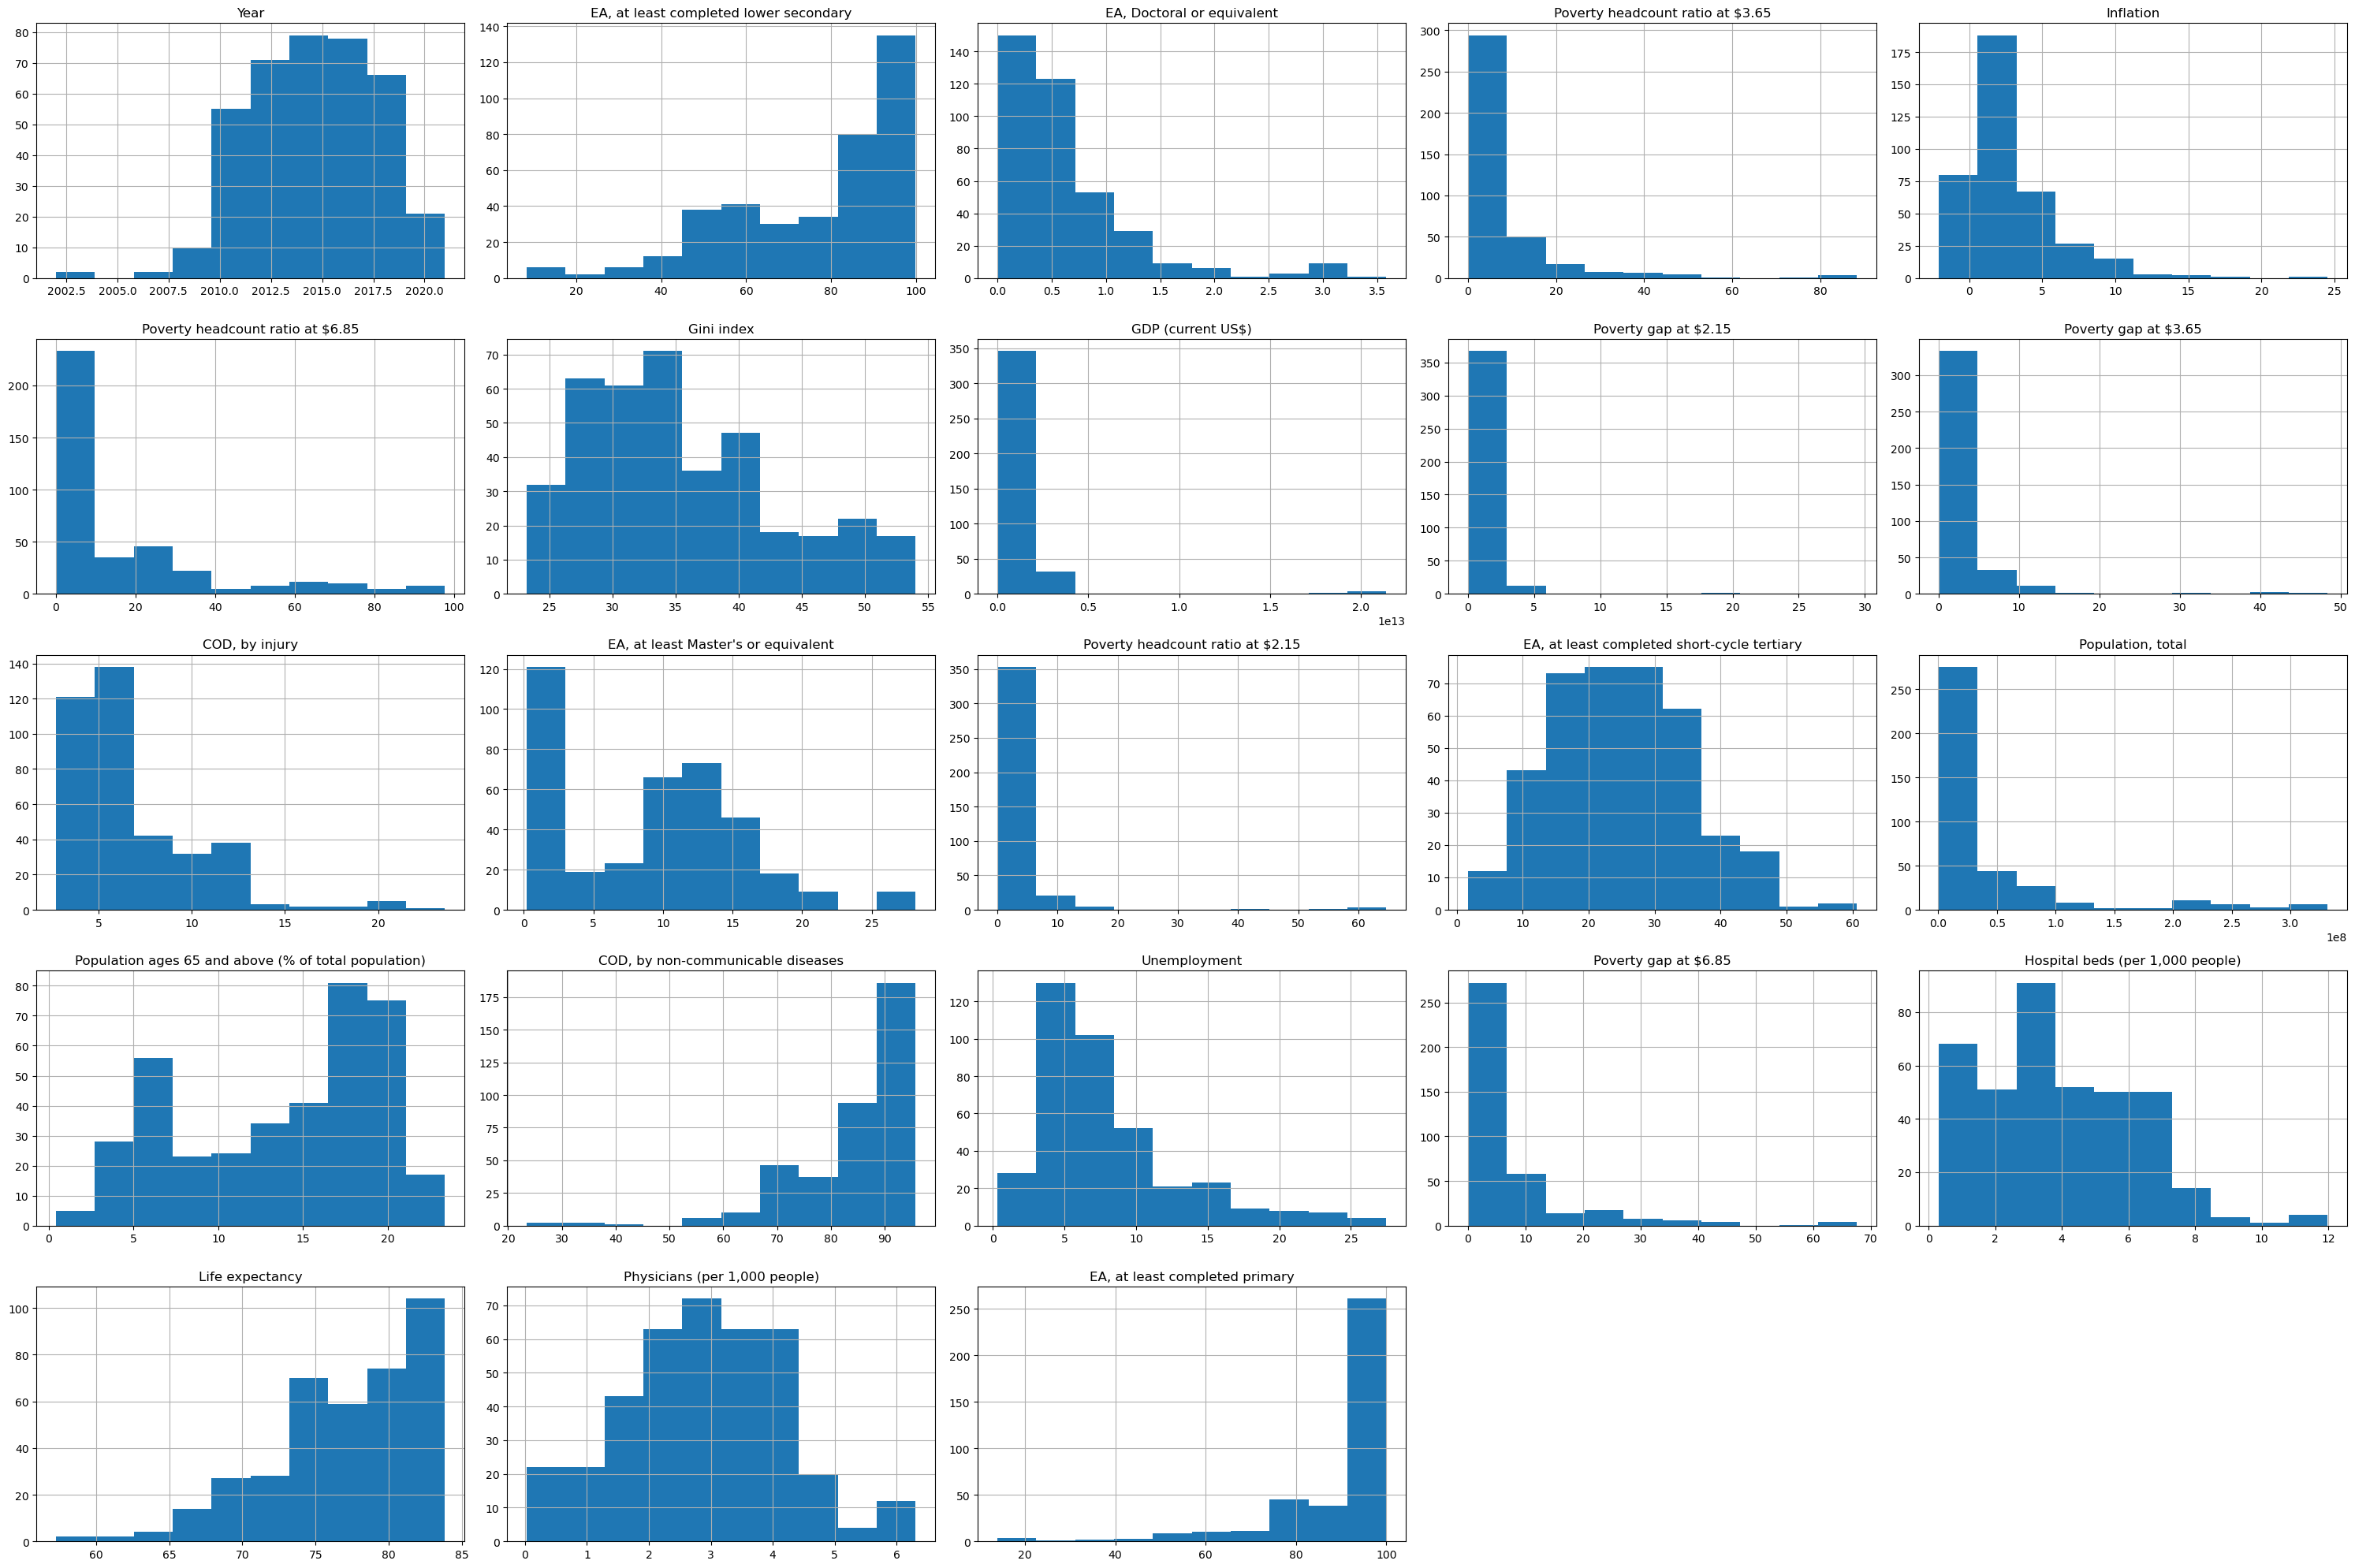

In [37]:

sample.hist(figsize=(30,20))   #Distribution of the final dataset
plt.tight_layout();
#plt.subplots_adjust(hspace=0.2);

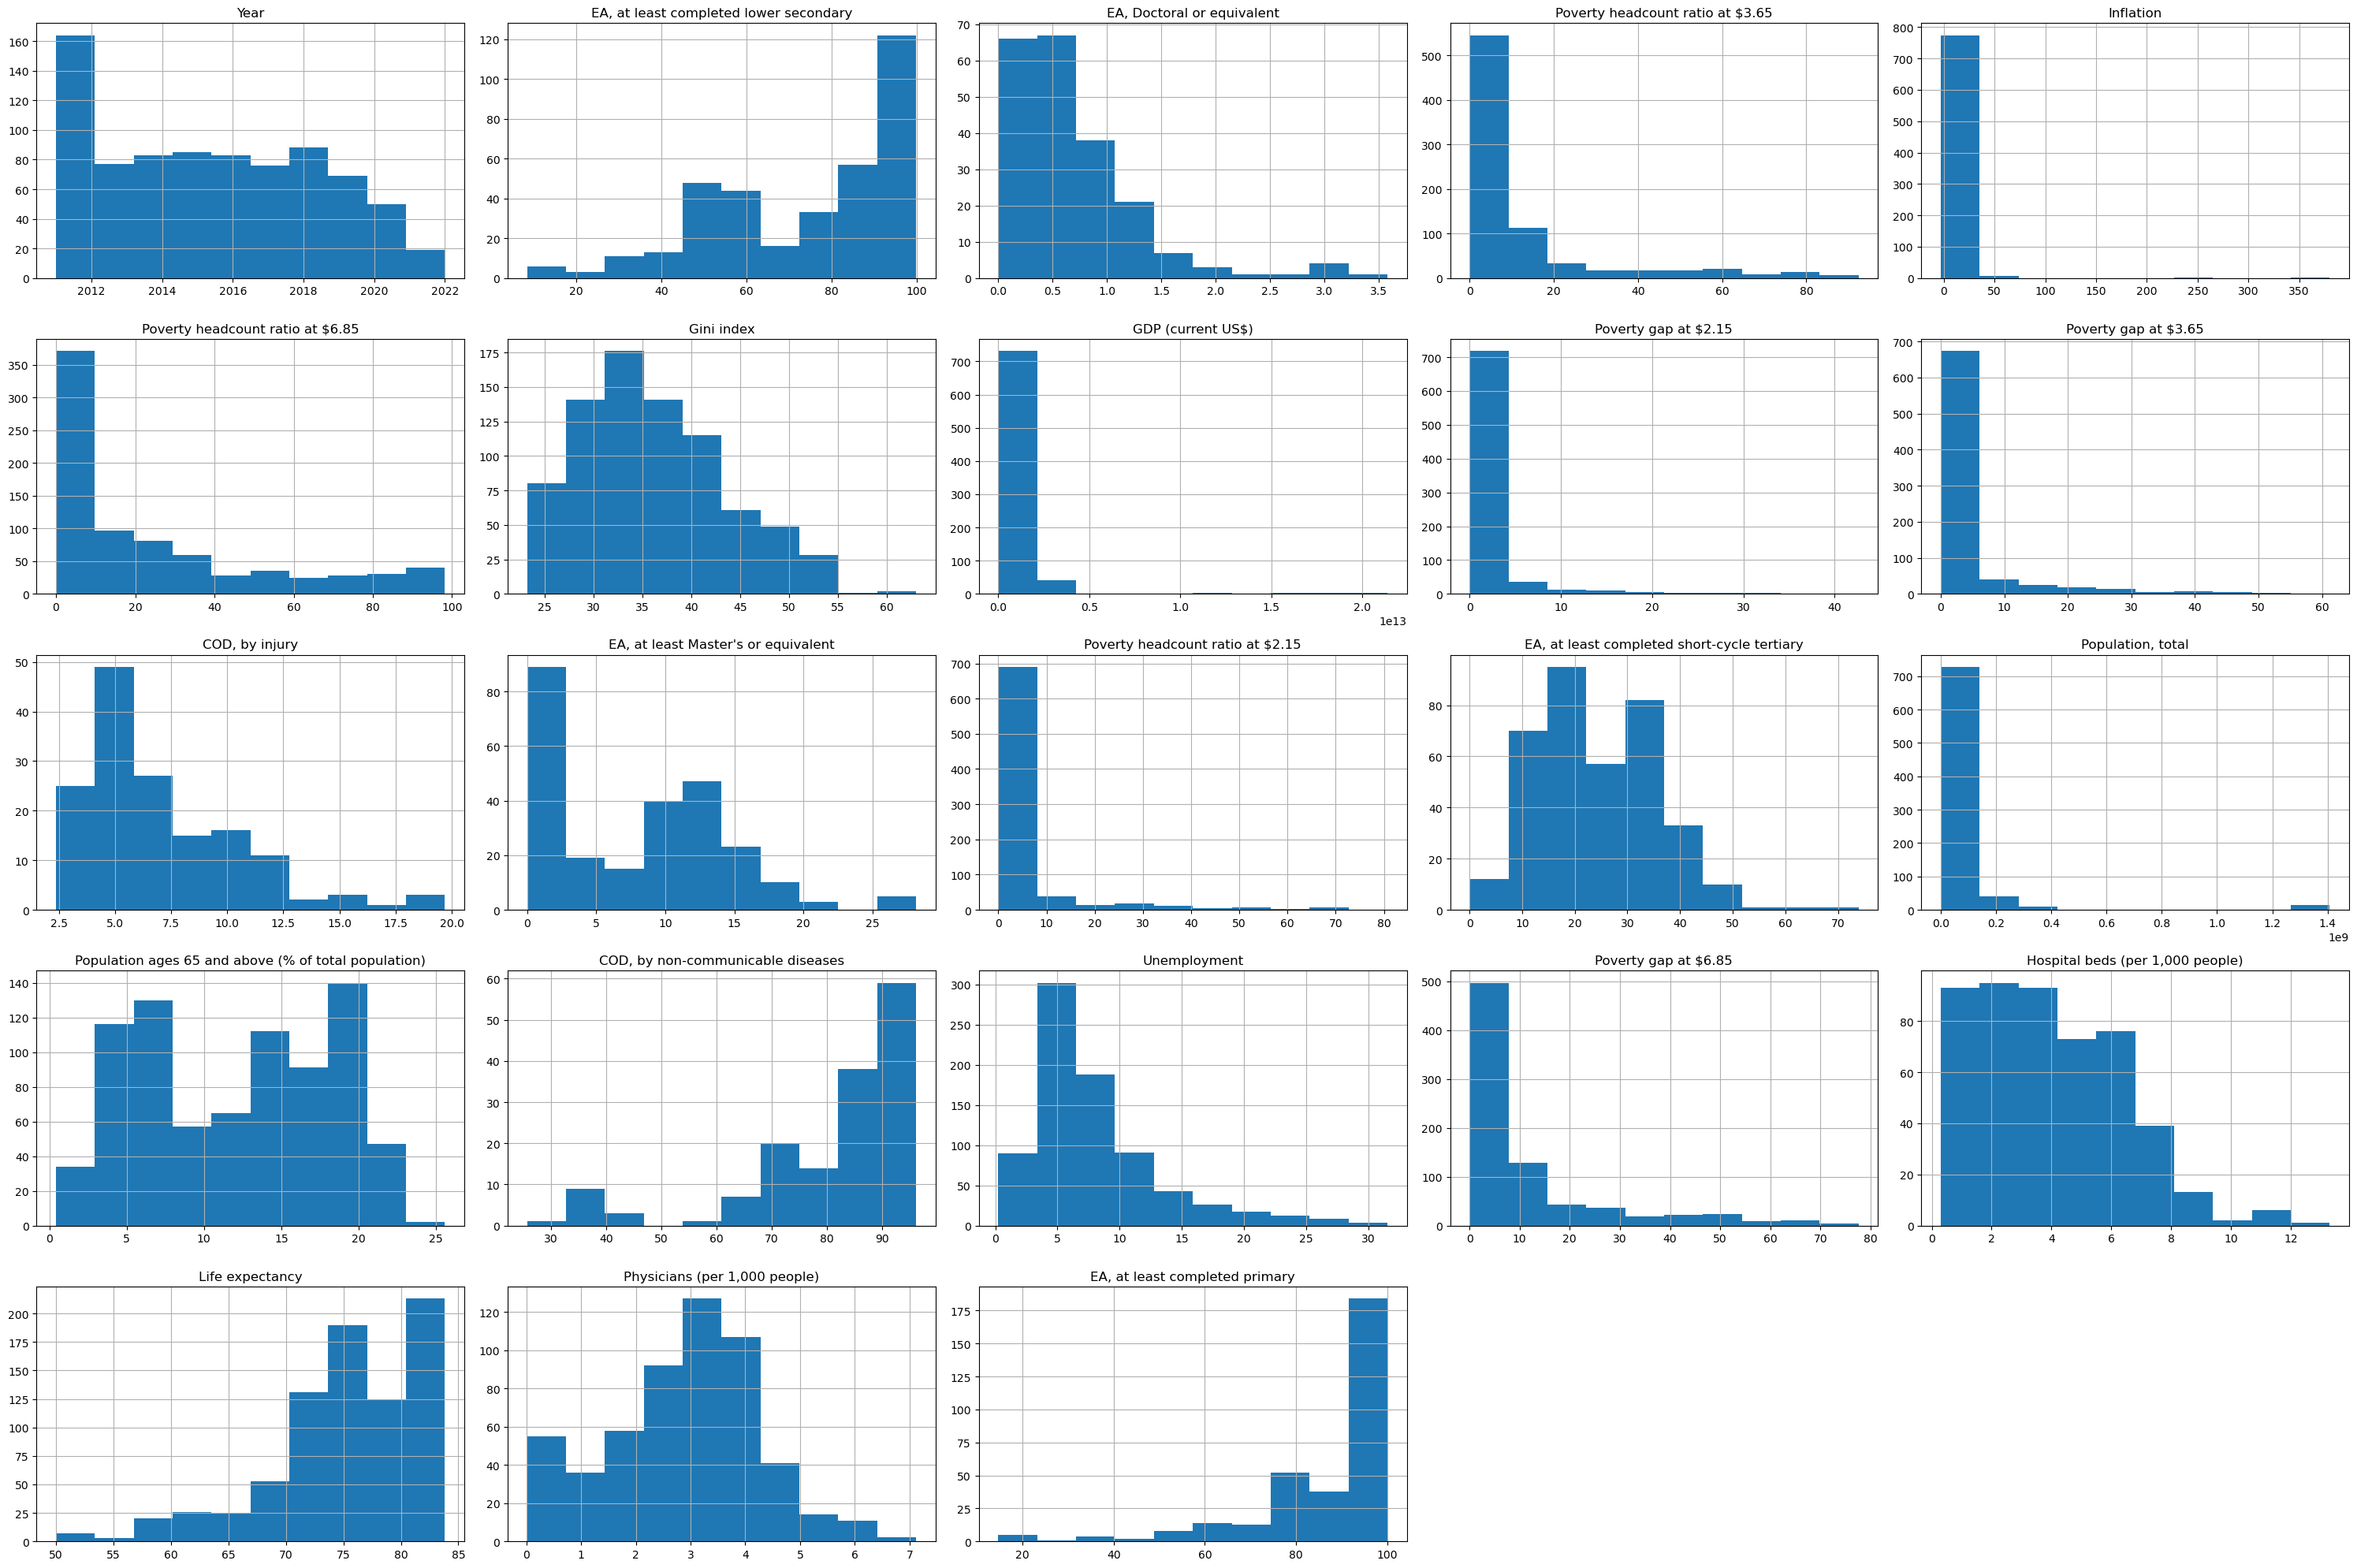

In [38]:
gini[(gini['Year'] > 2010) & (gini['Year'] < 2023) ].hist(figsize=(30,20)); # Distribution of the original dataset for those years
plt.tight_layout()

None of the distributions seem significantly different from the original dataset.

Inflation (1st row, 5th column) looks different but that's because The original dataset has one large outlier skewing the graph.

Speaking of outliers, some of the variables in our sample distribution look like they might have outliers but I'll leave them in for now as I plan to use more outlier robust models and those rows may have useful information. 
